# Tourmaline Python Notebook

This Python notebook will work "out of the box" with the test data included with Tourmaline. To run with your own data, just make sure to change the variables in the section **Define variables** to match your metadata and desired parameters.

## Install dependencies (first time only)

Install QIIME 2 Jupyter extension with:

In [ ]:
%%bash
jupyter serverextension enable --py qiime2 --sys-prefix

then restart your server.

(Interactive output not available on static notebook viewer services like nbviewer.)

## Import packages

In [1]:
from qiime2 import Artifact
from qiime2 import Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Define variables

In [2]:
method = 'dada2-pe'
filtering = 'unfiltered'
adiv_metric = 'observed_features'
bdiv_metric = 'unweighted_unifrac'
factor1 = 'filter_size'
factor2 = 'region'

## Set file paths

In [3]:
inputs = {
  'metadata': '../00-data/metadata.tsv',
  'taxonomy': '../02-output-%s-%s/01-taxonomy/taxonomy.qza' % (method, filtering),
  'repseq_prop': '../02-output-%s-%s/02-alignment-tree/repseqs_properties.tsv' % (method, filtering),
  'table': '../02-output-%s-%s/00-table-repseqs/table.qza' % (method, filtering),
  'adiv_vector': '../02-output-%s-%s/03-alpha-diversity/%s_vector.qza' % (method, filtering, adiv_metric),
  'repseqs_viz': '../02-output-%s-%s/00-table-repseqs/repseqs.qzv' % (method, filtering),
  'table_viz': '../02-output-%s-%s/00-table-repseqs/table.qzv' % (method, filtering),
  'taxonomy_viz': '../02-output-%s-%s/01-taxonomy/taxonomy.qzv' % (method, filtering),
  'taxa_bar': '../02-output-%s-%s/01-taxonomy/taxa_barplot.qzv' % (method, filtering),
  'rooted_tree': '../02-output-%s-%s/02-alignment-tree/rooted_tree.qzv' % (method, filtering),
  'adiv_grpsig': '../02-output-%s-%s/03-alpha-diversity/%s_group_significance.qzv' % (method, filtering, adiv_metric),
  'bdiv_emperor': '../02-output-%s-%s/04-beta-diversity/%s_emperor.qzv' % (method, filtering, bdiv_metric),
  'bdiv_grpsig': '../02-output-%s-%s/04-beta-diversity/%s_group_significance.qzv' % (method, filtering, bdiv_metric)
}

## Read and view DataFrames

### Metadata

In [4]:
df_md = pd.read_csv(inputs['metadata'], sep='\t', index_col=0)
df_md.head(3)

,sample_name_water,description,control_status,sample_pairing,sample_pairs,esp_storage_carousel,sample_station,auv_latitude_deg,auv_longitude_deg,archive_bottom,...,target_gene,target_subfragment,pcr_primers,pcr_primer_names,seq_meth,seq_platform,seq_model,seq_chemistry,run_center,run_date
sample_name,,,,,,,,,,,,,,,,,,,,,
SC07.22,SC07,Lake Erie sample,Lake Erie sample,"paired with SC06, SC05",15,SC07,Field 51-spare,41.703429,-83.070773,68,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"
SC07.50,SC07,Lake Erie sample,Lake Erie sample,"paired with SC06, SC05",15,SC07,Field 51-spare,41.703429,-83.070773,68,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"
SC13.22,SC13,Lake Erie sample,Lake Erie sample,"paired with SC12, SC11",13,SC13,Field 44,41.788077,-83.167444,164,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"


### Representative sequences properties

In [5]:
repseq_prop = pd.read_csv(inputs['repseq_prop'], sep='\t', index_col=0)
repseq_prop

,length,gaps,outlier,taxonomy,taxonomy_level_1,observations,log10(observations)
featureid,,,,,,,
b744eae1244325f606575483df0de67e,253,184,False,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,d__Bacteria,966.0,2.984977
9cfa52be027c8fa57d197b21dd7a958c,253,184,False,d__Bacteria; p__Actinobacteriota; c__Actinobac...,d__Bacteria,568.0,2.754348
3f456a18968cea5c5e549e281f0f5808,253,184,False,d__Bacteria; p__Actinobacteriota; c__Actinobac...,d__Bacteria,488.0,2.688420
251fb9e771085e0267a4f87cf841ce2f,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,340.0,2.531479
01514b1eefaab7c2b75c8a9d0f1c85e6,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,302.0,2.480007
...,...,...,...,...,...,...,...
6208bbf143fc29e81ad75b876a9a24ab,253,184,False,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,d__Bacteria,2.0,0.301030
2e064274622254707de5cb3c72a692bf,252,185,False,d__Bacteria; p__Firmicutes; c__Bacilli; o__Pae...,d__Bacteria,2.0,0.301030
3e834f7ea643d4a772d7e4196781ea7d,253,184,False,d__Bacteria; p__Desulfobacterota; c__Desulfuro...,d__Bacteria,2.0,0.301030


### Taxonomy

In [6]:
taxonomy = Artifact.load(inputs['taxonomy'])
df_tax = taxonomy.view(view_type=pd.DataFrame)
df_tax

,Taxon,Consensus
Feature ID,,
b744eae1244325f606575483df0de67e,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.7
9cfa52be027c8fa57d197b21dd7a958c,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.6
3f456a18968cea5c5e549e281f0f5808,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.9
251fb9e771085e0267a4f87cf841ce2f,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
...,...,...
1a27c63f6fee3c9b10ea7224d75f70b4,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.6
6208bbf143fc29e81ad75b876a9a24ab,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,0.6
e2b82a3e451a8e43e175bbeb3a56a713,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,1.0


### Feature table

In [7]:
table = Artifact.load(inputs['table'])
df_table = taxonomy.view(view_type=pd.DataFrame)
df_table

,Taxon,Consensus
Feature ID,,
b744eae1244325f606575483df0de67e,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.7
9cfa52be027c8fa57d197b21dd7a958c,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.6
3f456a18968cea5c5e549e281f0f5808,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.9
251fb9e771085e0267a4f87cf841ce2f,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
...,...,...
1a27c63f6fee3c9b10ea7224d75f70b4,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.6
6208bbf143fc29e81ad75b876a9a24ab,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,0.6
e2b82a3e451a8e43e175bbeb3a56a713,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,1.0


## Create static plots

### Representative sequences: histogram of sequence length

/Users/luke.thompson/miniconda3/envs/qiime2-2021.2/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


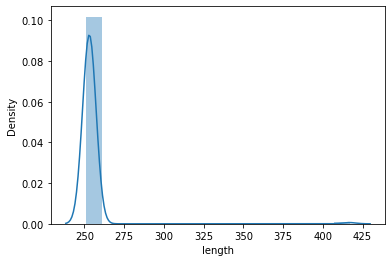

In [8]:
sns.distplot(repseq_prop['length'])

### Representative sequences: scatterplot of gaps vs length, color by taxonomy, size by observations, shape by outlier

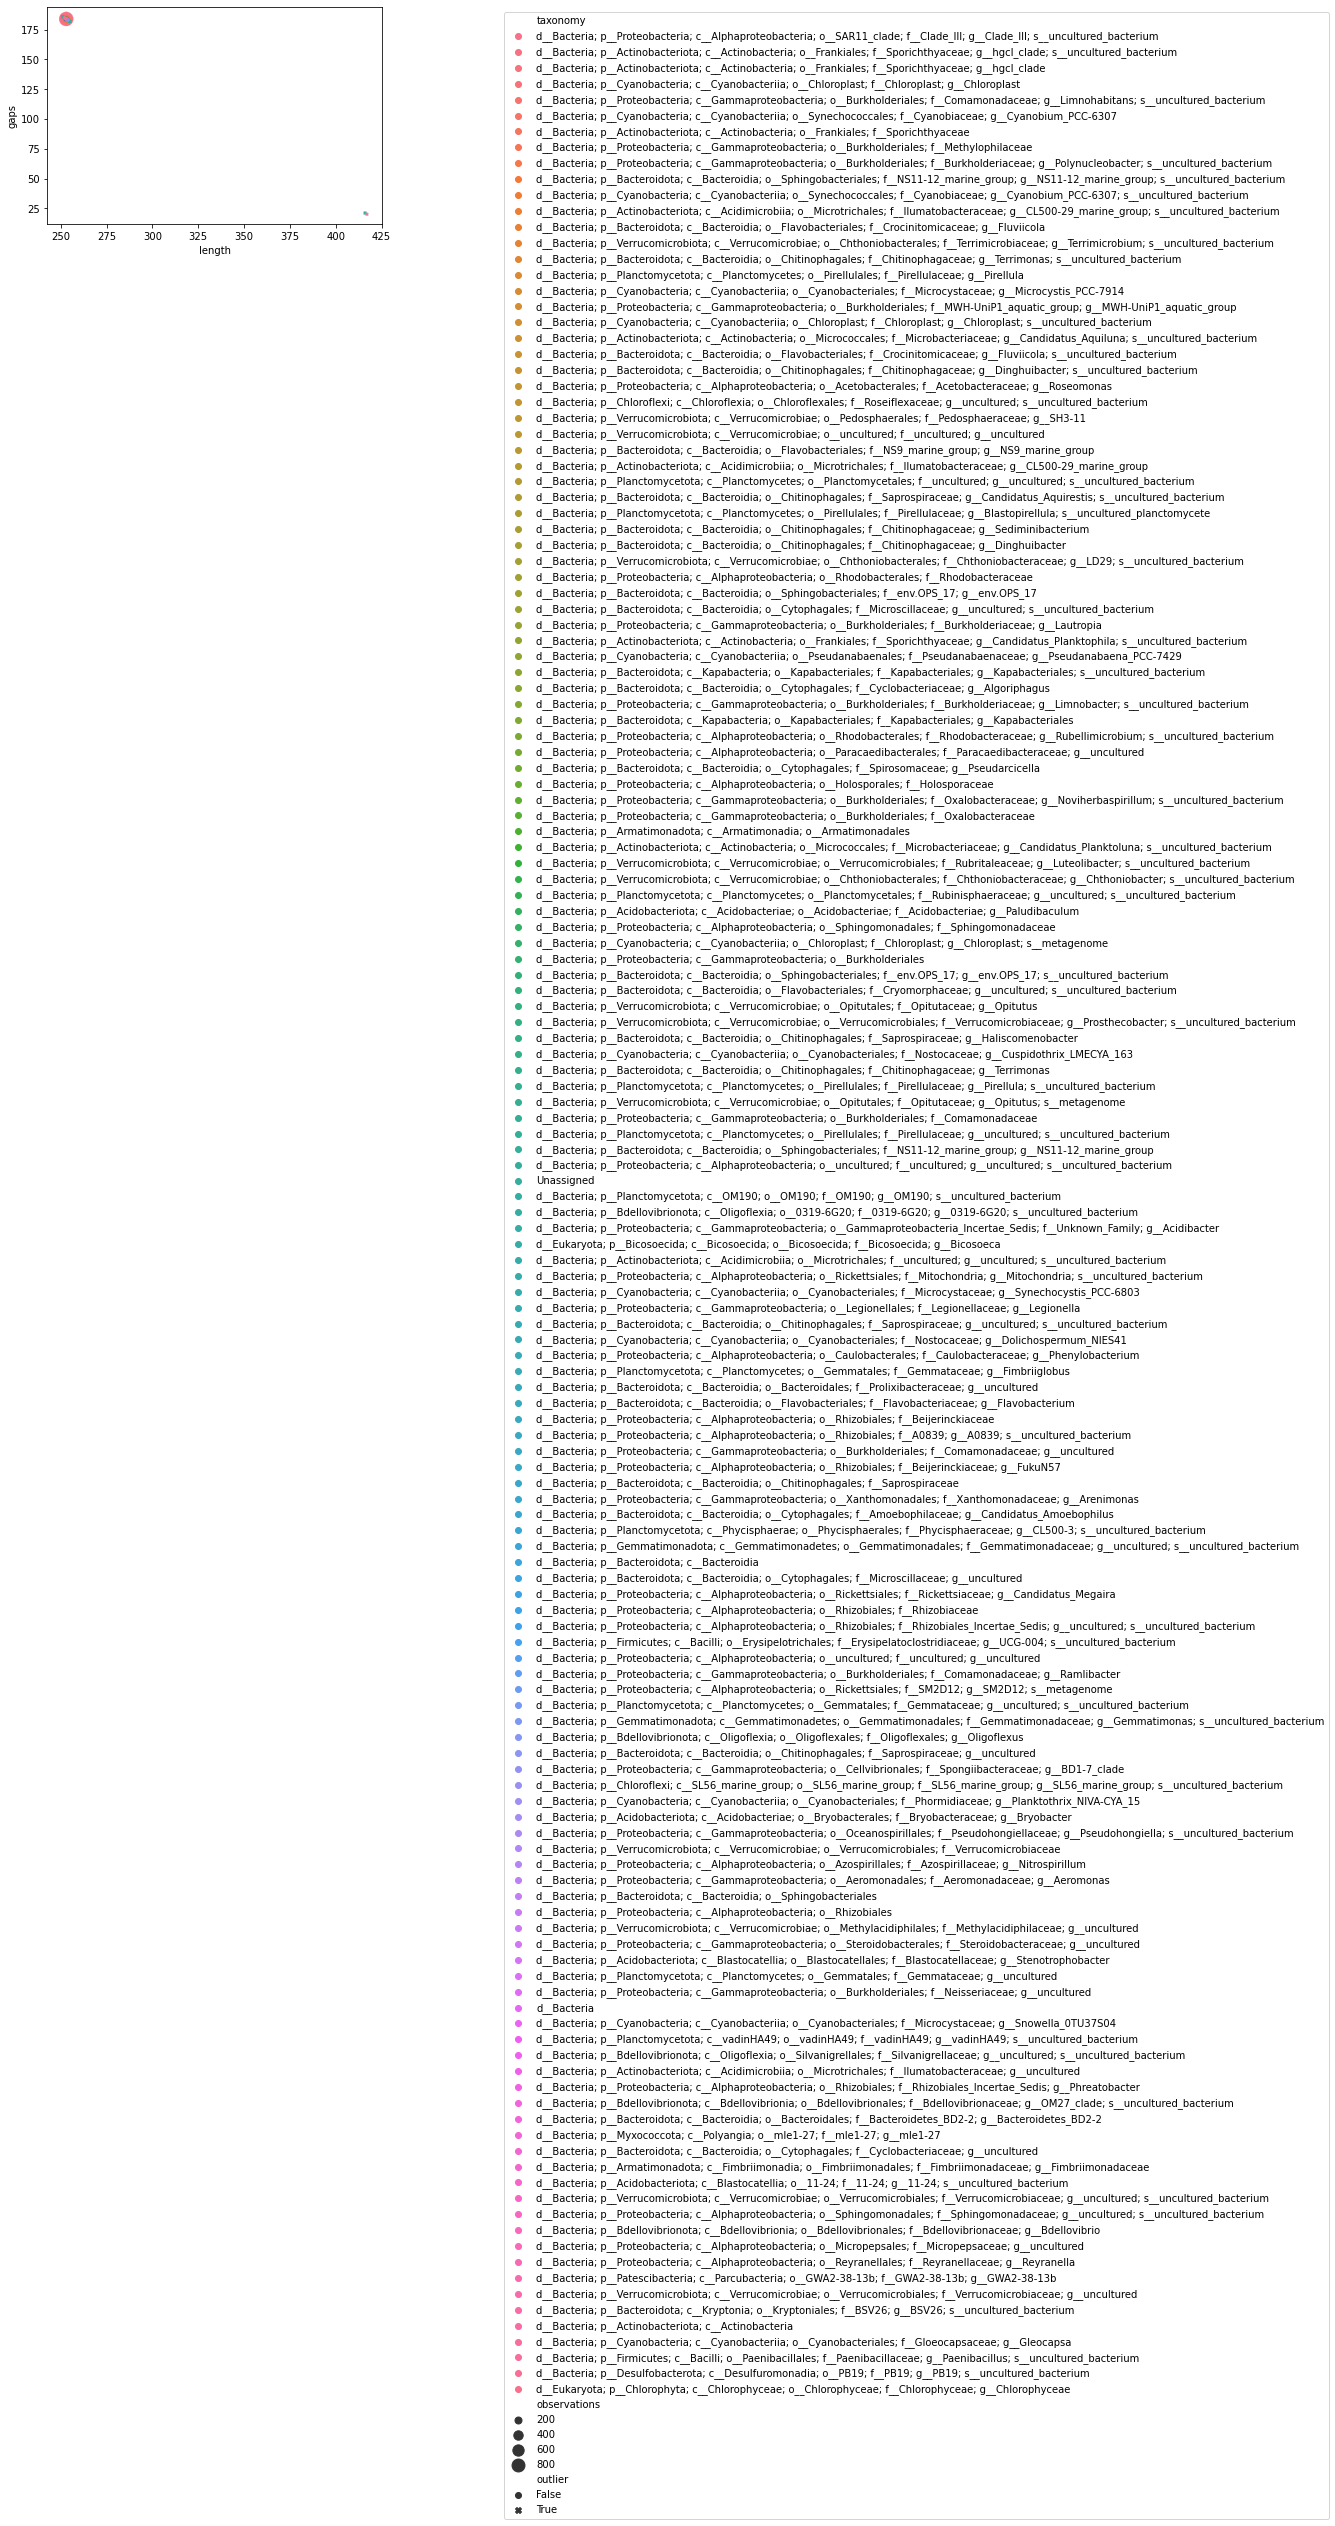

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=repseq_prop, x='length', y='gaps', style='outlier', hue='taxonomy', size='observations', 
                sizes=(10,200), edgecolor=None)
ax.legend(bbox_to_anchor=(1.35, 1.0));

### Alpha-diversity boxplots

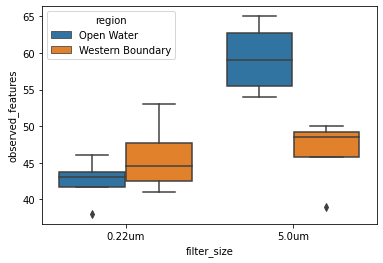

In [10]:
adiv_vector = Artifact.load(inputs['adiv_vector'])
df_adiv = adiv_vector.view(pd.Series)
df_adiv_md = pd.merge(df_md, df_adiv, left_index=True, right_index=True)
sns.boxplot(data=df_adiv_md, y=adiv_metric, x=factor1, hue=factor2)

## Display interactive visualizations

### Feature table

In [11]:
Visualization.load(inputs['table_viz'])

<visualization: Visualization uuid: c4bb004a-ee9b-4a66-9ff3-8fa9a8600f34>

### Representative sequences

In [12]:
Visualization.load(inputs['repseqs_viz'])

<visualization: Visualization uuid: 5442ee32-3098-40d6-ad60-c52276767296>

### Rooted tree

In [13]:
Visualization.load(inputs['rooted_tree'])

<visualization: Visualization uuid: 74204d0d-1829-40fb-9fd8-e3f9ebab0a66>

### Taxonomy

In [14]:
Visualization.load(inputs['taxonomy_viz'])

<visualization: Visualization uuid: ba839f2d-4d87-4257-bdc9-3bd9ffabe745>

### Taxonomy barplot

In [15]:
Visualization.load(inputs['taxa_bar'])

<visualization: Visualization uuid: 0050b1a3-52e8-4a67-b26e-e0d6e605ea04>

### Alpha-diversity group significance

In [16]:
Visualization.load(inputs['adiv_grpsig'])

<visualization: Visualization uuid: 06311765-3973-4a28-a316-db98f91299fb>

### Beta-diversity PCoA Emperor plot

In [17]:
Visualization.load(inputs['bdiv_emperor'])

<visualization: Visualization uuid: 6fc090b6-27c8-49be-babb-3acb84a8bc4c>

### Beta-diversity group significance

In [18]:
Visualization.load(inputs['bdiv_grpsig'])

<visualization: Visualization uuid: a02dbc6c-223b-4b0f-bab6-5f3b8974463c>